In [1]:
import gym

from rl_agents.agents import load_agent

100%|██████████| 200000/200000 [00:25<00:00, 7965.76it/s]


[[0.50500683 0.39252781 0.39443313 0.38725621]
 [0.26536291 0.2725674  0.27524449 0.39270202]
 [0.35161461 0.3506505  0.35075271 0.36188801]
 [0.29208447 0.30289168 0.29131143 0.35116685]
 [0.51966604 0.28724311 0.27522461 0.26776643]
 [0.         0.         0.         0.        ]
 [0.29598289 0.27633393 0.30222338 0.28272397]
 [0.         0.         0.         0.        ]
 [0.30767604 0.34923928 0.32729878 0.55148949]
 [0.39403773 0.60770781 0.43427975 0.38834224]
 [0.57678754 0.52046712 0.50097683 0.41596427]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.46718387 0.57201852 0.71486612 0.50873736]
 [0.74541131 0.84858775 0.80191324 0.78818776]
 [0.         0.         0.         0.        ]]


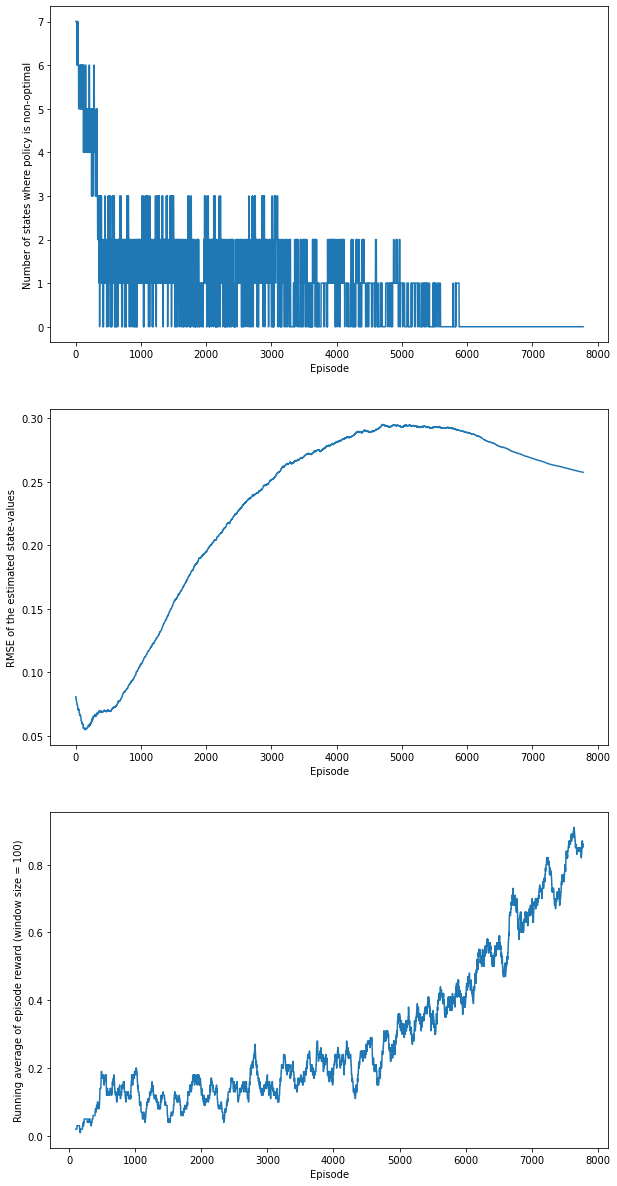

In [25]:
%run sarsa_training.py 4 200000

100%|██████████| 200000/200000 [00:46<00:00, 4346.41it/s]


[[0.81936343 0.81863227 0.81859368 0.81827045]
 [0.52028538 0.5229725  0.5737684  0.81731564]
 [0.70537296 0.70075831 0.70480769 0.81585242]
 [0.46195842 0.51095648 0.4781933  0.8151093 ]
 [0.82063813 0.53591294 0.55204232 0.49394467]
 [0.         0.         0.         0.        ]
 [0.51557437 0.22194939 0.51270226 0.21435562]
 [0.         0.         0.         0.        ]
 [0.46255586 0.48846502 0.53994961 0.82268296]
 [0.55573118 0.8266742  0.51709811 0.51229047]
 [0.76996206 0.56900445 0.45237885 0.42457453]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.62783424 0.58476034 0.89156399 0.56163594]
 [0.85939598 0.94756608 0.89682658 0.88175038]
 [0.         0.         0.         0.        ]]


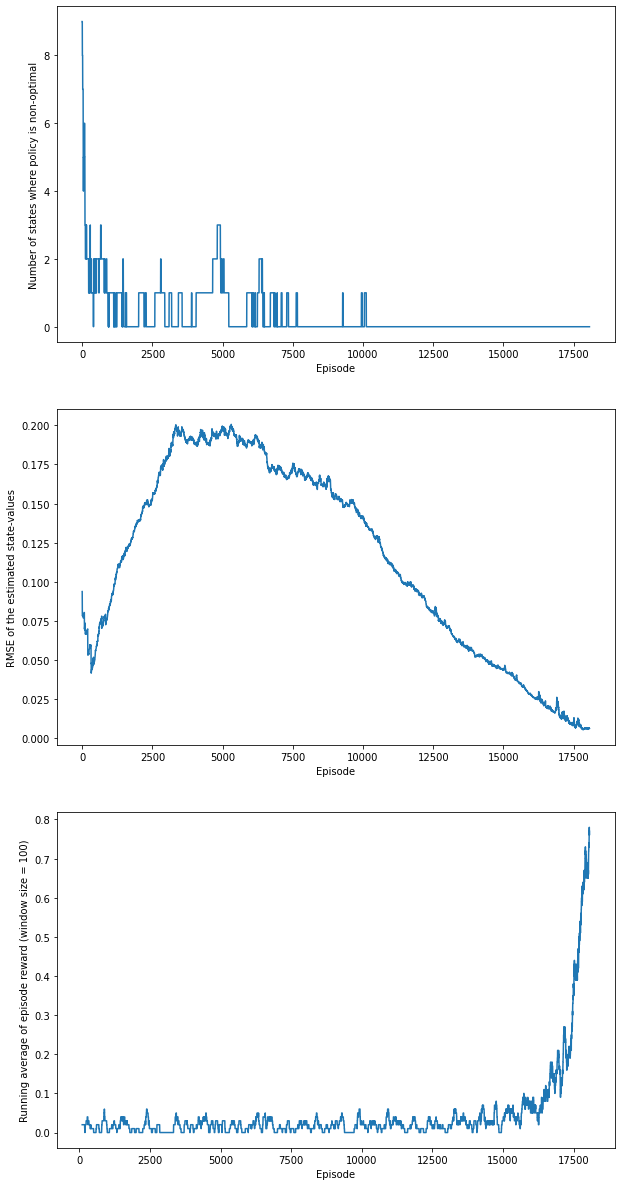

In [4]:
%run expected_sarsa_training.py 4 200000

100%|██████████| 200000/200000 [00:24<00:00, 8064.51it/s]


[[0.77619694 0.77374966 0.77385045 0.77360152]
 [0.5237033  0.51217298 0.51114974 0.7687072 ]
 [0.68761911 0.67135621 0.67224781 0.76182581]
 [0.49864692 0.51123634 0.48728386 0.75588532]
 [0.7763521  0.51053299 0.53255017 0.50830974]
 [0.         0.         0.         0.        ]
 [0.49279651 0.21683568 0.49740575 0.27637801]
 [0.         0.         0.         0.        ]
 [0.52476957 0.52933321 0.47978792 0.77681766]
 [0.55552426 0.7779317  0.56362454 0.51135258]
 [0.72375369 0.59068043 0.45420516 0.45053844]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.50462544 0.61822611 0.83999181 0.54772633]
 [0.82073043 0.90723155 0.88521594 0.84408801]
 [0.         0.         0.         0.        ]]


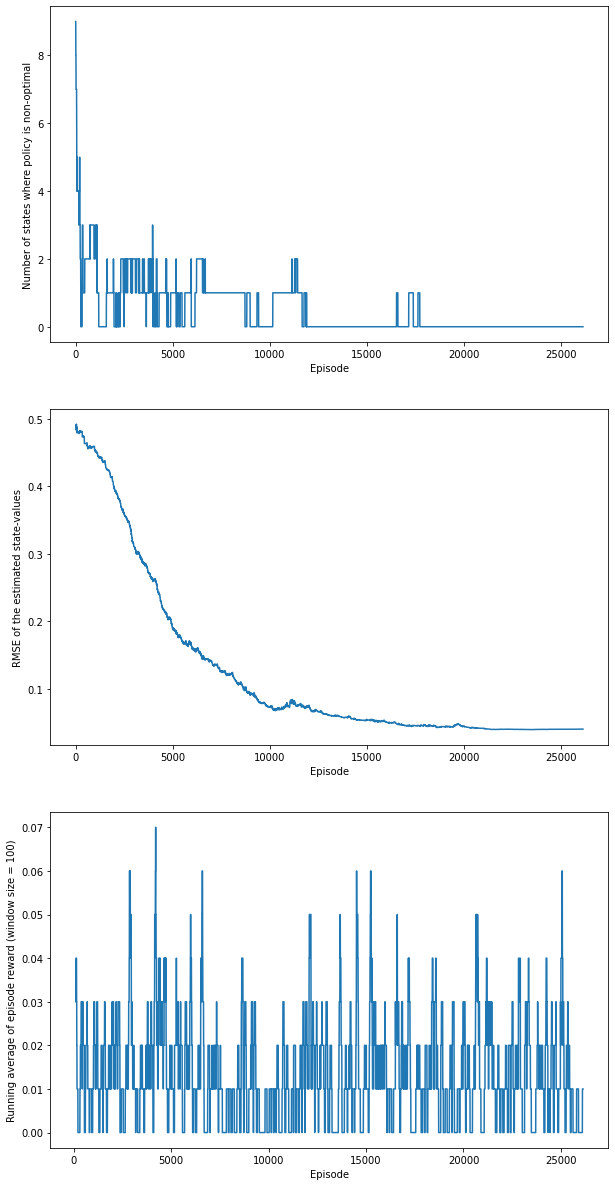

In [6]:
%run q_learning_training.py 4 200000

100%|██████████| 200000/200000 [00:26<00:00, 7628.06it/s]


[[0.82472225 0.82341742 0.82338998 0.82344914]
 [0.54541059 0.53217606 0.55536269 0.82124943]
 [0.72865749 0.72972413 0.72322981 0.81811707]
 [0.54438685 0.5511921  0.53224679 0.81621142]
 [0.82480692 0.53399852 0.53729217 0.56933004]
 [0.         0.         0.         0.        ]
 [0.53277012 0.1860959  0.52646753 0.29947443]
 [0.         0.         0.         0.        ]
 [0.53251526 0.53687633 0.54662352 0.82506603]
 [0.53577939 0.82587481 0.58158732 0.55617375]
 [0.76902346 0.54197309 0.53205272 0.42131765]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.60471596 0.59061184 0.8836473  0.61797637]
 [0.85851813 0.94231599 0.89932705 0.87763491]
 [0.         0.         0.         0.        ]]


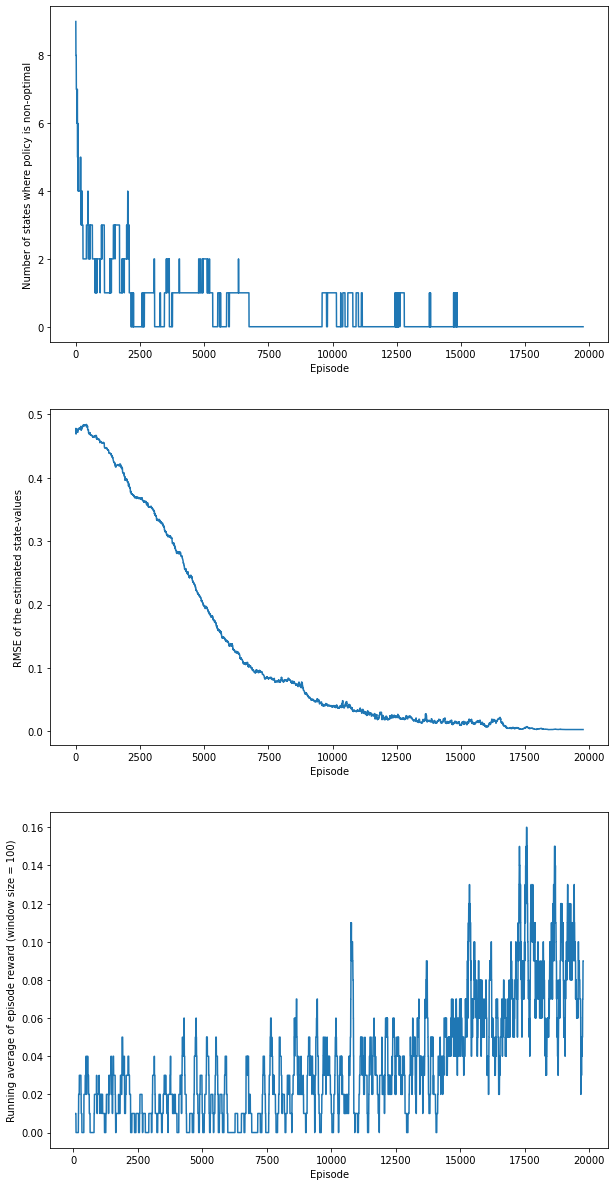

In [8]:
%run q_learning_eps_training.py 4 200000

In [26]:
# Fetch the agents that resulted from training in inference mode:
agents= {}
for alg in ('sarsa', 'expected_sarsa', 'q_learning', 'q_learning_eps'):
    agents[alg] = load_agent(f'saved_agents/{alg}_agent')
    agents[alg].set_mode('inference')

In [27]:
map_size = int(agents['sarsa'].env.observation_space.n **(1/2))

if map_size == 4:
    map_name = '4x4'
elif map_size == 8:
    map_name = '8x8'

env = gym.make('FrozenLake-v1', desc=None, map_name=map_name, is_slippery=True)
env._max_episode_steps = 10000

In [30]:
average_reward_per_episode = {}

for alg in ('sarsa', 'expected_sarsa', 'q_learning', 'q_learning_eps'):
    episodes = 0
    total_reward = 0
    observation = env.reset()
    while episodes < 10000:
        action = agents[alg].get_action(observation)
        observation, reward, done, info = env.step(action)
        total_reward += reward

        if done:
            observation = env.reset()
            episodes += 1

    average_reward_per_episode[alg] = total_reward / episodes

env.close()

In [32]:
average_reward_per_episode

{'sarsa': 0.8247,
 'expected_sarsa': 0.8194,
 'q_learning': 0.8268,
 'q_learning_eps': 0.8261}